In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [37]:
file_paths = {
    "Pure_Al": "JE FN Final_Pure_Al.xlsx",
    "AlGr0.5": "JE FN Final_AlGr0.5.xlsx",
    "AlGr1": "JE FN Final_AlGr1.xlsx",
}

In [38]:
def load_data(file_path):
    df = pd.read_excel(file_path, sheet_name="Sheet1")
    return df[["J", "E"]].dropna()
data = {name: load_data(path) for name, path in file_paths.items()}


In [39]:
AlGr1_5 = pd.DataFrame()
AlGr1_5["E"] = np.linspace(data["AlGr0.5"]["E"].min(), data["AlGr1"]["E"].max(), 100)-1-0.189
AlGr1_5["J"] = (data["AlGr0.5"]["J"].interpolate() + data["AlGr1"]["J"].interpolate()) / 2
#AlGr1_5["Shifted_E"] = AlGr1_5["E"] - 1

In [40]:
#data["AlGr1.5"] = AlGr1_5
combined_data = pd.concat(data.values(), keys=data.keys()).reset_index(level=0).rename(columns={"level_0": "Material"})

In [41]:
train_data = combined_data[combined_data["Material"] != "AlGr1.5"]
X = train_data[["E"]]
y = train_data["J"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model = Sequential([
    Dense(64, activation='relu', input_dim=1),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 118957.8984 - mae: 201.9318 - val_loss: 96702.7266 - val_mae: 178.2953
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 98897.0156 - mae: 171.7154 - val_loss: 96374.6016 - val_mae: 177.4474
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 100183.5625 - mae: 173.9823 - val_loss: 96050.7344 - val_mae: 176.6219
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 96335.3672 - mae: 170.3018 - val_loss: 95738.7500 - val_mae: 175.8579
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 85575.8281 - mae: 156.5289 - val_loss: 95387.6094 - val_mae: 175.0278
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 108993.9297 - mae: 192.1881 - val_loss: 94948.1484 - val_mae: 174.0469
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 95538.6172 - mae: 173.6922 - val_loss: 94415.9609 - val_mae: 173.0529
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 96746.1953 - mae: 171.2342 -

In [44]:
AlGr1_5["Predicted_J"] = model.predict(AlGr1_5[["E"]])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


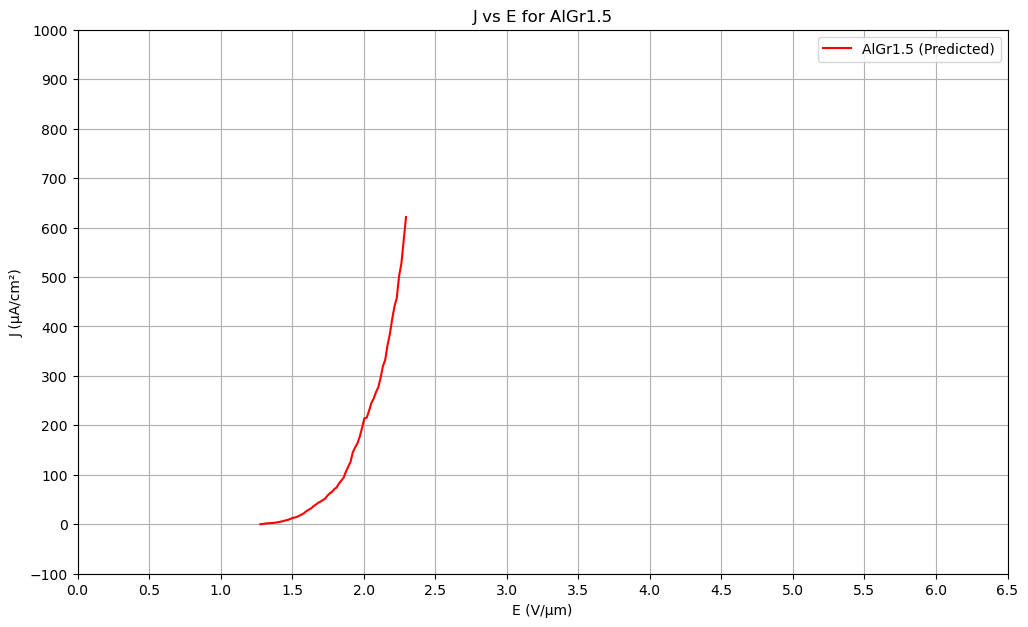

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(bottom=0.2)

line, = ax.plot(AlGr1_5["E"], AlGr1_5["J"], label="AlGr1.5 (Predicted)", color='red')

ax.set_xlim(0, 6.5)
ax.set_ylim(AlGr1_5["J"].min() - 1, AlGr1_5["J"].max() + 1)
ax.set_xticks(np.arange(0, 7, 0.5))
ax.set_yticks(np.arange(-100, 1100, 100))
#ax.set_title("Interactive J vs E Plot with Shifted AlGr1.5")
ax.legend()
ax.grid()
plt.xlabel("E (V/μm)")
plt.ylabel("J (μA/cm²)")
plt.title("J vs E for AlGr1.5")
plt.legend()
plt.show()

In [46]:
def load_data(file_path):
    df2 = pd.read_excel(file_path, sheet_name="Sheet1")
    return df2[["J", "E"]].dropna()
data2 = {name: load_data(path) for name, path in file_paths.items()}

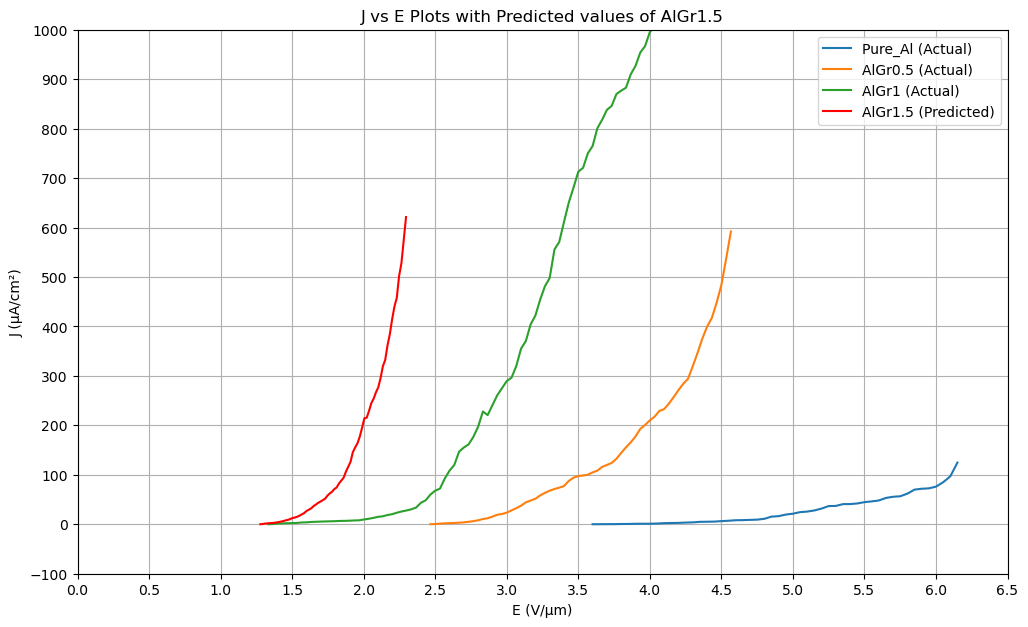

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(bottom=0.2)

for material, df2 in data2.items():
    ax.plot(df2["E"], df2["J"], label=f"{material} (Actual)")

line, = ax.plot(AlGr1_5["E"], AlGr1_5["J"], label="AlGr1.5 (Predicted)", color='red')
ax.set_xlim(0, 6.5)
ax.set_ylim(AlGr1_5["J"].min() - 1, AlGr1_5["J"].max() + 1)
ax.set_xticks(np.arange(0, 7, 0.5))
ax.set_yticks(np.arange(-100, 1100, 100))
plt.xlabel("E (V/μm)")
plt.ylabel("J (μA/cm²)")
ax.set_title("J vs E Plots with Predicted values of AlGr1.5")
ax.legend()
ax.grid()

'''
ax_slider = plt.axes([0.25, 0.05, 0.5, 0.03])
slider = Slider(ax_slider, "Shift", -2.0, 2.0, valinit=-1, valstep=0.1)
def update(val):
    shift = slider.val
    line.set_xdata(AlGr1_5["E"] + shift)
    fig.canvas.draw_idle()

slider.on_changed(update)
'''

plt.show()

In [48]:
AlGr1_5.to_excel('Predicted_JE_AlGr2.xlsx', index=False)

In [65]:
model.save("AlGr1.5_Predictive_Model.h5")

In [66]:
model.save("AlGr1.5_Predictive_Model.keras")